# Mnist

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

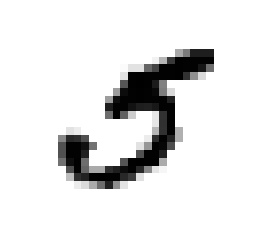

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
somedigit=X[36000]
some_digit_image = somedigit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[6000:]

In [7]:
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Bianry Classifier

In [8]:
y_train_5 = (y_train==5)
Y_test_5 = (y_test==5)

In [9]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [10]:
sgd_clf.predict([somedigit])

array([ True], dtype=bool)

# Performance Measure

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([ 0.9682 ,  0.96255,  0.8922 ])

# Confusion Matrix

In [12]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52007,  2572],
       [  969,  4452]])

In [15]:
y_train_perfect_predict = y_train_5.copy()
confusion_matrix(y_train_5, y_train_perfect_predict)

array([[54579,     0],
       [    0,  5421]])

# Precision and Recall

In [16]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.63382687927107062

In [17]:
recall_score(y_train_5, y_train_pred)

0.82125069175428889

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.71546805946163117

In [19]:
y_scores = cross_val_predict(sgd_clf, X_train,y_train_5,
                            cv=3, method='decision_function')

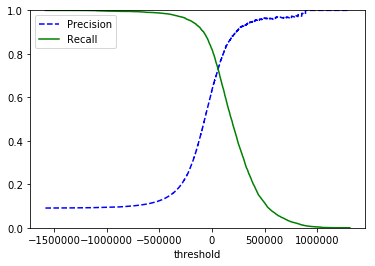

In [21]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)
def plot_precision_recall_vs_threshold(precisions, recalls, threshold):
    plt.plot(thresholds, precisions[:-1],'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('threshold')
    plt.legend(loc='best')
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

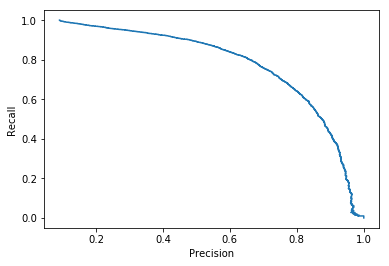

In [23]:
plt.plot(precisions, recalls)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()

In [30]:
y_train_pred_90 = (y_scores>250000)
precision_score(y_train_5, y_train_pred_90)

0.9104671280276817

In [31]:
recall_score(y_train_5, y_train_pred_90)

0.38830474082272642

# ROC Curve

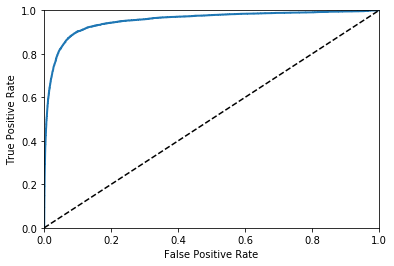

In [32]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

In [33]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.95368796354787089

In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method='predict_proba')

In [35]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

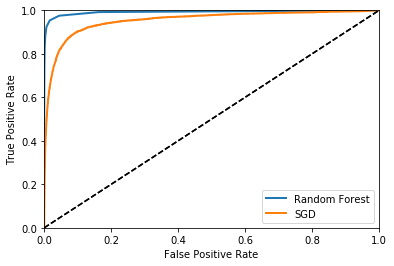

In [37]:
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plot_roc_curve(fpr, tpr, 'SGD')
plt.legend(loc='best')
plt.show()

In [38]:
roc_auc_score(y_train_5, y_scores_forest)

0.99215866811178799

# Multiclass Classification

In [39]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([somedigit])

array([ 5.])

In [40]:
some_digit_scores =  sgd_clf.decision_function([somedigit])
some_digit_scores

array([[-235576.95538405, -565008.55873072, -303826.97560414,
        -163087.8801489 , -306247.87545254,   46088.46306265,
        -572995.11484221, -362541.40136441, -646348.2499413 ,
        -474383.69426456]])

In [41]:
np.argmax(some_digit_scores)

5

In [42]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [43]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([somedigit])

array([ 5.])

In [44]:
len(ovo_clf.estimators_)

45

# Multilabel Classifications

In [58]:
y_train_large = (y_train)
y_train_odd = (y_train % 3 )
y_multilabel = np.c_[y_train_large, y_train_odd]
forest_clf.fit(X_train, y_multilabel)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [59]:
forest_clf.predict([somedigit])

array([[ 5.,  2.]])

In [60]:
forest_clf.predict_proba([somedigit])

[array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]]),
 array([[ 0.,  0.,  1.]])]

In [61]:
test_digit = np.random.random_sample(somedigit.shape)
forest_clf.predict_proba([test_digit])

[array([[ 0. ,  0.2,  0.1,  0.1,  0. ,  0.4,  0. ,  0.1,  0. ,  0.1]]),
 array([[ 0.2,  0.3,  0.5]])]